In [2]:
#Attribute Information:
#   1. sepal length in cm
#   2. sepal width in cm
#   3. petal length in cm
#   4. petal width in cm
#   5. class:
#      -- Iris Setosa
#      -- Iris Versicolour
#      -- Iris Virginica

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import preprocessing,svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
pd.pandas.set_option("display.max_columns",None)
cols=['sl','sw','pl','pw','class']
df=pd.read_csv('/mnt/c/Users/Srujan/Documents/Datasets/iris.data',names=cols,header=None)
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>0]
len(features_nan)
l=[]
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        l.append(feature)
l


[]

## EDA

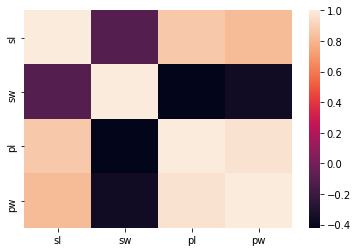

In [7]:
sns.heatmap(df.corr())

In [8]:
input_features=['sl','sw','pl','pw']

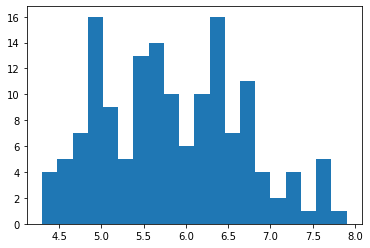

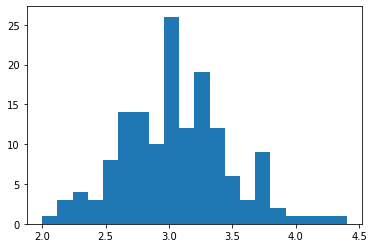

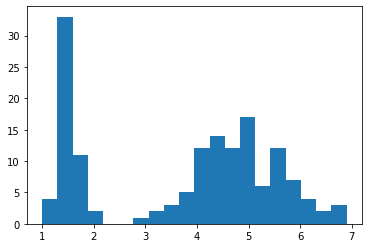

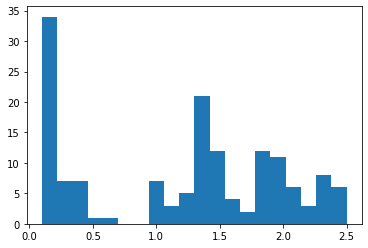

In [9]:
for feature in input_features:
    plt.hist(df[feature],bins=20)
    plt.show()

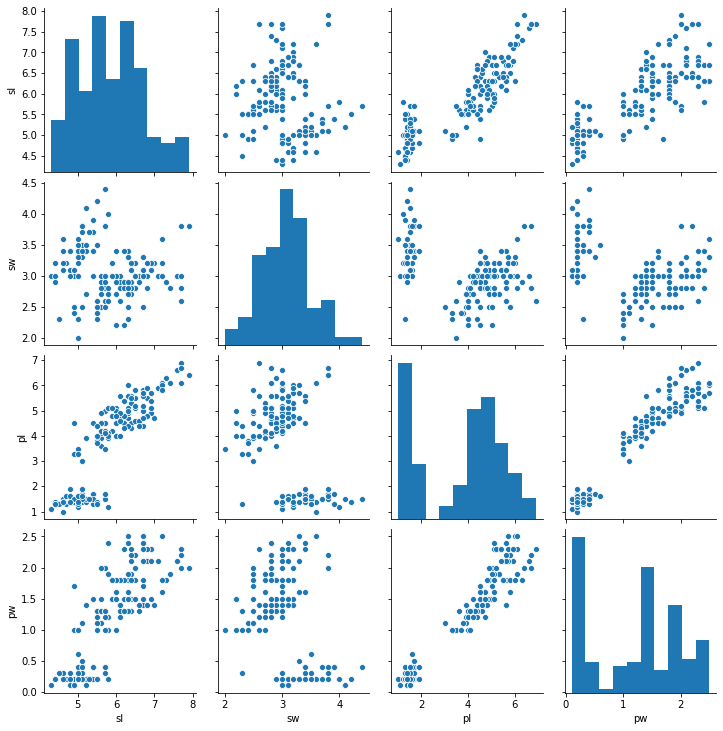

In [10]:
sns.pairplot(df)

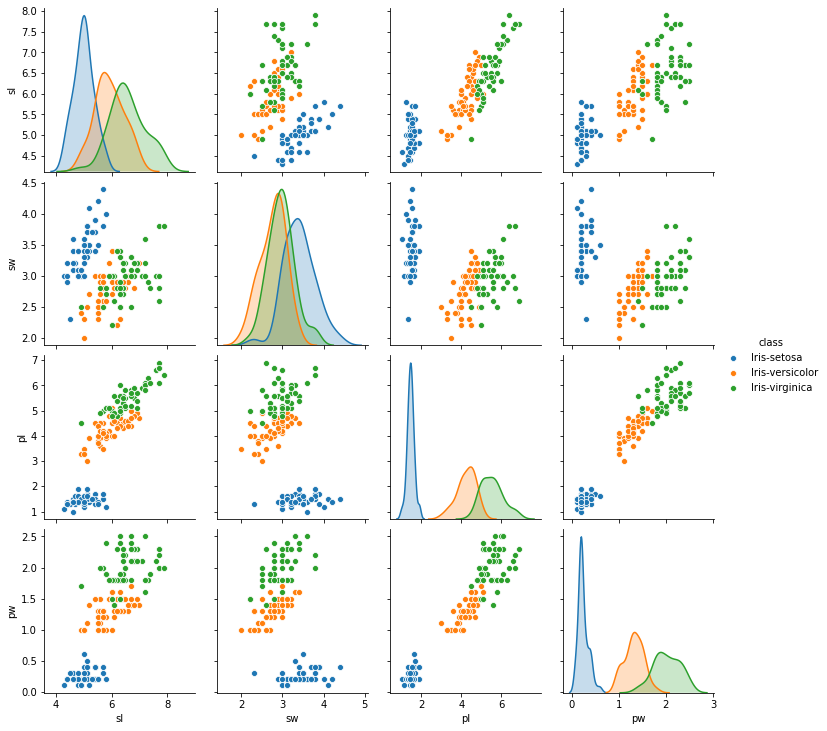

In [11]:
sns.pairplot(df,hue='class')

## Feature Enigineering

In [12]:
df['class']=df['class'].astype('category')
df['class']=df['class'].cat.codes
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
for feature in input_features:
    df[feature]=np.log(df[feature])
df

,sl,sw,pl,pw,class
0,1.629241,1.252763,0.336472,-1.609438,0
1,1.589235,1.098612,0.336472,-1.609438,0
2,1.547563,1.163151,0.262364,-1.609438,0
3,1.526056,1.131402,0.405465,-1.609438,0
4,1.609438,1.280934,0.336472,-1.609438,0
...,...,...,...,...,...
145,1.902108,1.098612,1.648659,0.832909,2
146,1.840550,0.916291,1.609438,0.641854,2
147,1.871802,1.098612,1.648659,0.693147,2
148,1.824549,1.223775,1.686399,0.832909,2


In [14]:
for feature in df.columns:
    print(Counter(df[feature]))

Counter({1.6094379124341003: 10, 1.62924053973028: 9, 1.840549633397487: 9, 1.7404661748405046: 8, 1.9021075263969205: 8, 1.7578579175523736: 7, 1.7047480922384253: 7, 1.8562979903656263: 7, 1.589235205116581: 6, 1.6863989535702288: 6, 1.791759469228055: 6, 1.8082887711792655: 6, 1.7227665977411035: 6, 1.5686159179138452: 5, 1.8718021769015913: 5, 1.5260563034950492: 4, 1.6486586255873816: 4, 1.9315214116032138: 4, 1.824549292051046: 4, 2.0412203288596382: 4, 1.4816045409242156: 3, 1.7749523509116738: 3, 1.916922612182061: 3, 1.9740810260220096: 3, 1.547562508716013: 2, 1.8870696490323797: 2, 1.4586150226995167: 1, 1.5040773967762742: 1, 1.667706820558076: 1, 1.9459101490553132: 1, 1.9600947840472698: 1, 2.028148247292285: 1, 1.9878743481543455: 1, 2.0014800002101243: 1, 2.066862759472976: 1})
Counter({1.0986122886681098: 26, 1.0296194171811581: 14, 1.1631508098056809: 13, 1.1314021114911006: 12, 1.2237754316221157: 12, 1.0647107369924282: 10, 0.9932517730102834: 9, 0.9162907318741551:

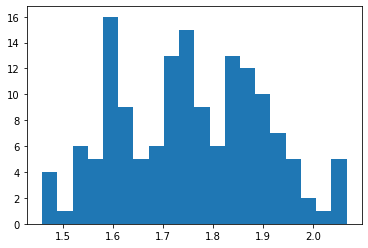

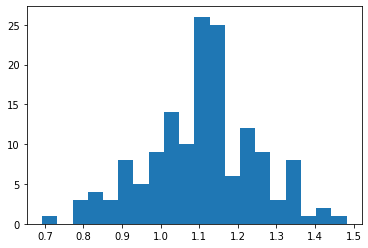

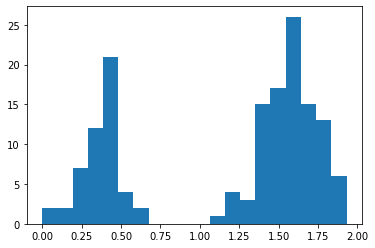

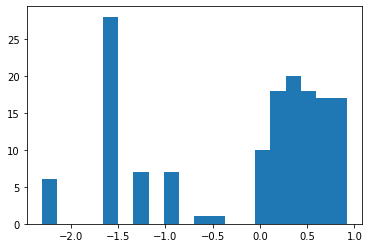

In [15]:
for feature in input_features:
    plt.hist(df[feature],bins=20)
    plt.show()

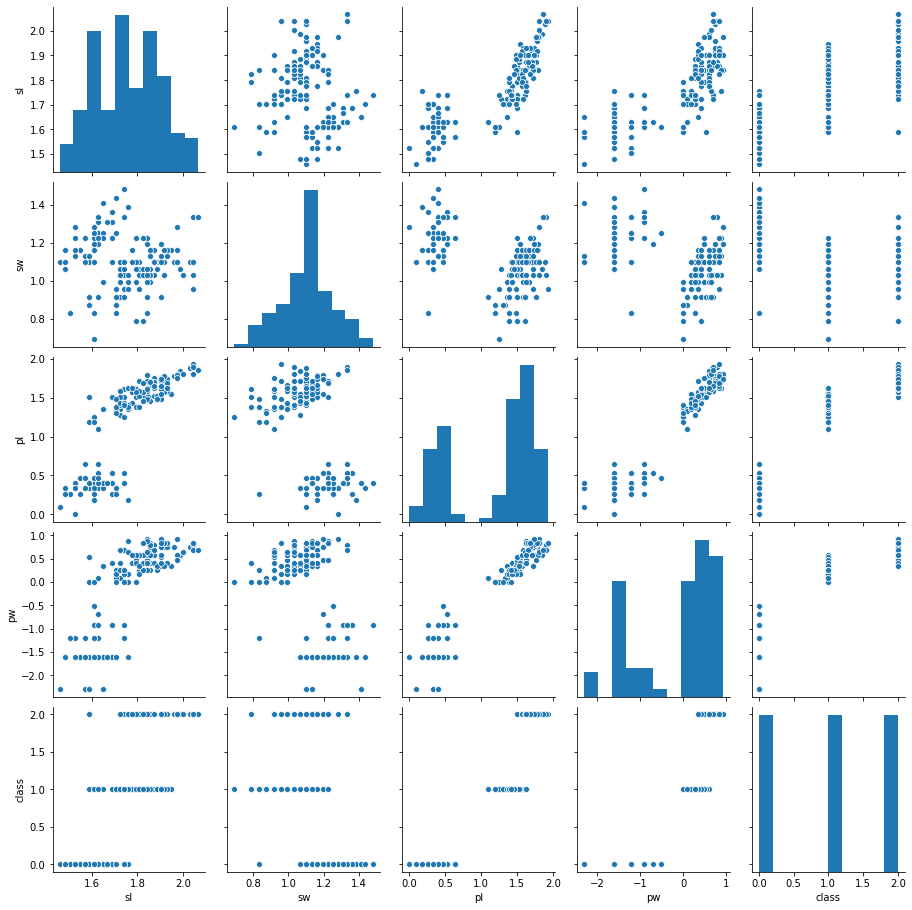

In [16]:
sns.pairplot(df)

In [17]:
scaler=preprocessing.StandardScaler()
X=df.drop(['class'],axis=1)
y=np.array(df['class'])
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
X=scaler.transform(X)
X

array([[-0.89649267,  1.03139989, -1.42806876, -1.44976989],
       [-1.18078775, -0.05519289, -1.42806876, -1.44976989],
       [-1.47693181,  0.39973271, -1.55420464, -1.44976989],
       [-1.62976414,  0.1759393 , -1.31063906, -1.44976989],
       [-1.03721864,  1.22997359, -1.42806876, -1.44976989],
       [-0.49030045,  1.79418666, -1.09760445, -0.74826348],
       [-1.62976414,  0.82706963, -1.42806876, -1.03941495],
       [-1.03721864,  0.82706963, -1.31063906, -1.44976989],
       [-1.94565744, -0.29416155, -1.42806876, -1.44976989],
       [-1.18078775,  0.1759393 , -1.31063906, -2.1512763 ],
       [-0.49030045,  1.42310623, -1.31063906, -1.44976989],
       [-1.32731725,  0.82706963, -1.20079092, -1.44976989],
       [-1.32731725, -0.05519289, -1.42806876, -2.1512763 ],
       [-2.10903082, -0.05519289, -1.83853996, -2.1512763 ],
       [ 0.01751761,  1.97264936, -1.69044177, -1.44976989],
       [-0.10607557,  2.64448132, -1.31063906, -0.74826348],
       [-0.49030045,  1.

In [19]:
#sns.pairplot(pd.DataFrame(X))

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=svm.SVC()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)
print("cost of training model\n",metrgics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

0.9
cost of training model
 [[37  0  0]
 [ 0 43  1]
 [ 0  4 35]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.95        44
           2       0.97      0.90      0.93        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

cost of testing model
 [[12  1  0]
 [ 0  6  0]
 [ 0  2  9]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.95        44
           2       0.97      0.90      0.93        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [27]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
acc=clf.score(X_test,y_test)
print(acc)
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)
print("cost of training model\n",metrics.confusion_matrix(y_train,train_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))
print("cost of testing model\n",metrics.confusion_matrix(y_test,test_preds))
print("cost of training model\n",metrics.classification_report(y_train,train_preds))

0.9666666666666667
cost of training model
 [[37  0  0]
 [ 0 44  0]
 [ 0  0 39]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

cost of testing model
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
cost of training model
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

